# Lab 6: Association Rule Mining with Apriori and FP-Growth

# **Name:** Chandra Kiran Billingi  
# **Course:** Advanced Big Data and Data Mining (MSCS-634)

                                    Step 1: Data Preparation

In [ ]:
# Installing all the necessary libraries for the codes to run

!pip install ucimlrepo mlxtend seaborn --quiet

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules


In [ ]:
# loading the Retail Rocket Data with orders and product details  into pandas library
order_products = pd.read_csv("order_products__prior.csv")
products = pd.read_csv("products.csv")

#As we have 2 different sets and both of the sets contains the necessary variables we need to merge them into a single data set with the necessary features required for the model evaluation
merged_df = pd.merge(order_products, products, on='product_id', how='left')

In [ ]:
# Analyzing the data and its features
merged_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [ ]:
merged_df.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id
count,3.550349e+06,3.550349e+06,3.550349e+06,3.550349e+06,3.550349e+06,3.550349e+06
mean,1.873512e+05,2.558084e+04,8.347691e+00,5.897344e-01,7.119317e+01,9.922936e+00
std,1.081853e+05,1.409663e+04,7.138292e+00,4.918819e-01,3.820685e+01,6.281992e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,9.389000e+04,1.353500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00
50%,1.871940e+05,2.527200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00
75%,2.808350e+05,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01
max,3.751180e+05,4.968800e+04,1.270000e+02,1.000000e+00,1.340000e+02,2.100000e+01


In [ ]:
#Understanding the structure of the data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550349 entries, 0 to 3550348
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          int64 
 4   product_name       object
 5   aisle_id           int64 
 6   department_id      int64 
dtypes: int64(6), object(1)
memory usage: 189.6+ MB


We can see that we have the entries more than 3 million which will can resemble an ideal case scenario
As we have seen and understood the datatype structure we need to perform the data cleaning

In [ ]:
# Checking for missing values if there are any
missing_counts = merged_df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 order_id             0
product_id           0
add_to_cart_order    0
reordered            0
product_name         0
aisle_id             0
department_id        0
dtype: int64


As we can see that there are no missing values

In [ ]:
# Removing duplicate rows
# count the number of rows before applying the change
before = merged_df.shape[0]

# Drop duplicates
merged_df.drop_duplicates(inplace=True)

# Counting  the rows after dropping
after = merged_df.shape[0]

# Printing the number of duplicates removed
print(f"Number of duplicate rows removed: {before - after}")


Number of duplicate rows removed: 0


We can see that there are no duplicate rows in the data to be removed

In [ ]:
# applying the encoding to reduce the size and to avoid the memory crash error
from mlxtend.preprocessing import TransactionEncoder

# Create list of transactions (each order is a list of product names)
transactions = merged_df.groupby('order_id')['product_name'].apply(list).tolist()

# Applying the TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)

basket_df = pd.DataFrame(te_data, columns=te.columns_)
basket = basket_df[basket_df.sum(axis=1) >= 2]

/tmp/ipython-input-37-4292829846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette="mako")


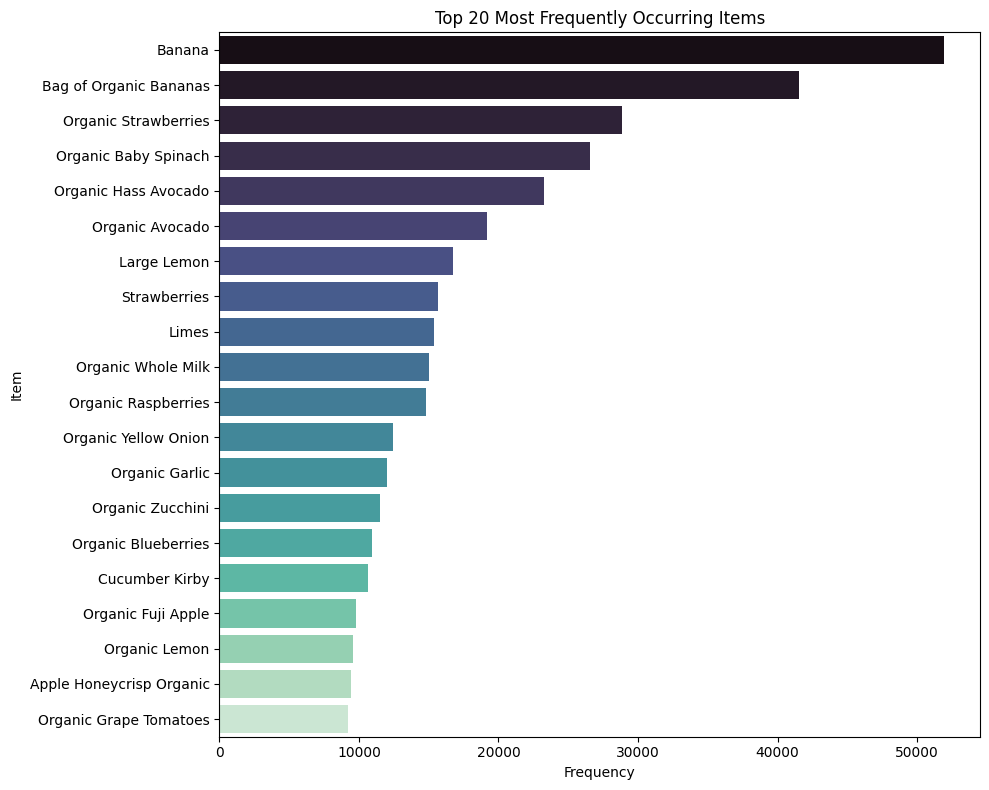

In [ ]:
# plot of the 20 Most Frequent Items
top_items = basket_df.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_items.values, y=top_items.index, palette="mako")
plt.title("Top 20 Most Frequently Occurring Items")
plt.xlabel("Frequency")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

The above was the  barplot of the top 20 most ordered products.

Interpretation:

Items like “Banana,” “Bag of Organic Bananas,” and “Organic Strawberries” are among the top purchased items.

Which indicates a high demand for fruits and organic products in the dataset.

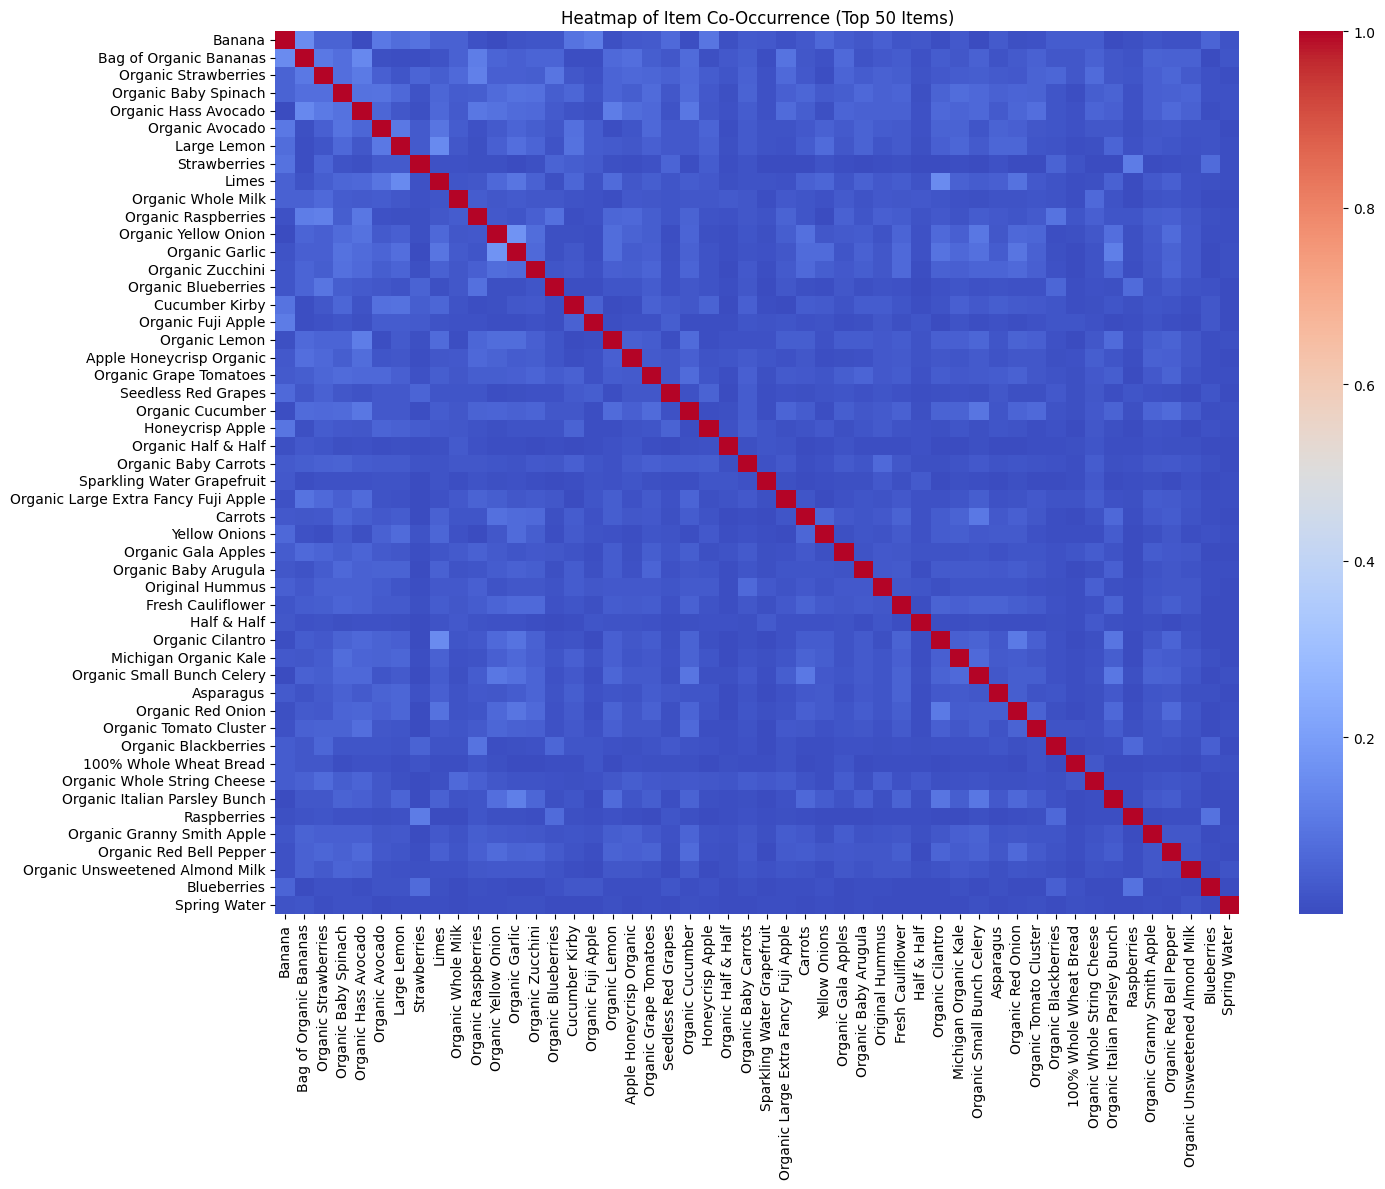

In [ ]:
# Get the top 50 most frequent items
top_items = basket_df.sum().sort_values(ascending=False).head(50).index

# Filter basket_df to include only those items
basket_top = basket_df[top_items]

# Now compute correlation and plot
corr_matrix = basket_top.corr().abs()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Heatmap of Item Co-Occurrence (Top 50 Items)")
plt.tight_layout()
plt.show()


From the heat map we can observe that there is a strong co-occurrence between Banana and Organic Strawberries , Organic Haas avocado and Banana, BlueBerries and Banana  which suggests frequent joint purchases.

The diagonal shows each product with itself (value = 1).

These patterns can be used for cross selling and bundling purchases and also can be used for marketing and discouting promotions to attract more customers

                            Step 2: Frequent Itemset Mining Using Apriori

In [ ]:
# Frequent Item set mining using Apriori
# As apriori has been already installed at the start of the project we can start coding
import time
start_time_ap = time.time()
basket = basket[basket.sum(axis=1) >= 2]
freq_ap = apriori(basket, min_support=0.01, use_colnames=True)
ap_time = time.time() - start_time_ap


print(f"Apriori completed in {ap_time:.2f} seconds.")


Apriori completed in 73.90 seconds.


In [ ]:
# Adding  itemset length column for the support
freq_ap['length'] = freq_ap['itemsets'].apply(lambda x: len(x))
print(f"Total number of frequent itemsets generated by Apriori: {len(freq_ap)}")

# Displaying the  top 15 frequent items with support support
top_ap = freq_ap.sort_values('support', ascending=False).head(15)
top_ap[['itemsets', 'support']]


Total number of frequent itemsets generated by Apriori: 127


,itemsets,support
6,(Banana),0.154257
5,(Bag of Organic Bananas),0.123033
77,(Organic Strawberries),0.085741
38,(Organic Baby Spinach),0.078833
58,(Organic Hass Avocado),0.069281
34,(Organic Avocado),0.056991
29,(Large Lemon),0.049943
100,(Strawberries),0.046394
31,(Limes),0.045878
80,(Organic Whole Milk),0.044505


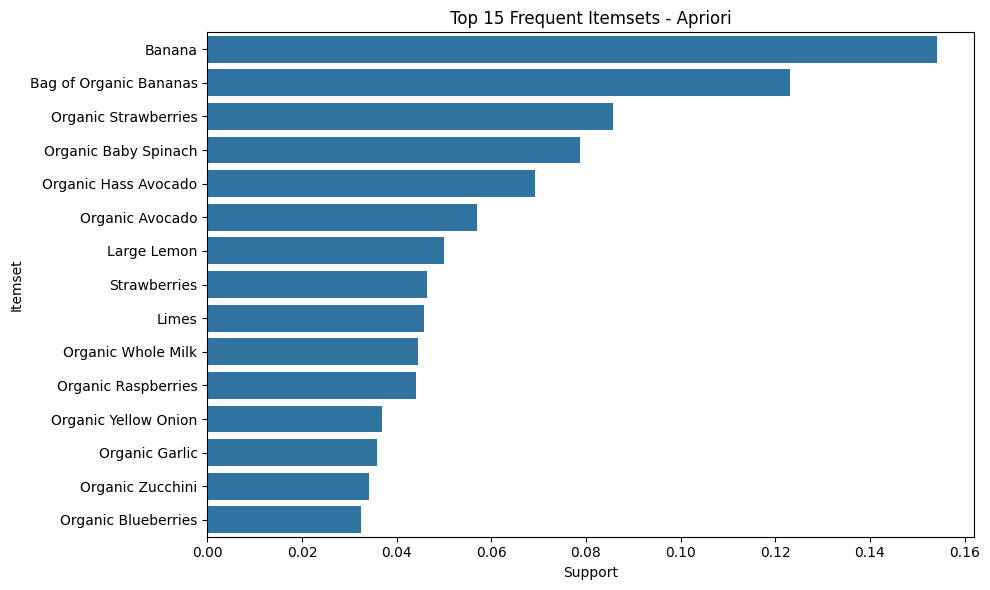

In [ ]:
# Histgram plot of top 15 elements using the apriori algorithm
top_ap = freq_ap.sort_values('support', ascending=False).head(15)
top_ap['itemsets_str'] = top_ap['itemsets'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets_str', data=top_ap)
plt.title("Top 15 Frequent Itemsets - Apriori")
plt.xlabel("Support")
plt.ylabel("Itemset")
plt.tight_layout()
plt.show()

From the barplot we can see that

Itemsets like 'Banana' and 'Bag of Organic Bananas', have the highest support out of all the data sets.

Items like Cucumber Kirby and Organic Zucchini have the least support out of all the data sets.

Some itemsets include 2 or 3 items, indicating combinations frequently bought together.

These combinations are excellent candidates for combo deals, recommendation engines, or subscription boxes.

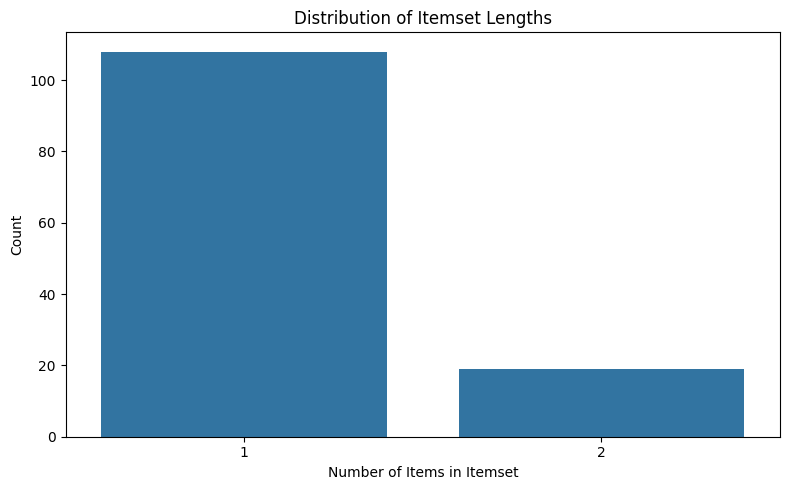

In [ ]:
# Histogram of the Item length sets
freq_ap['length'] = freq_ap['itemsets'].apply(lambda x: len(x))

plt.figure(figsize=(8, 5))
sns.countplot(x='length', data=freq_ap)
plt.title("Distribution of Itemset Lengths")
plt.xlabel("Number of Items in Itemset")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


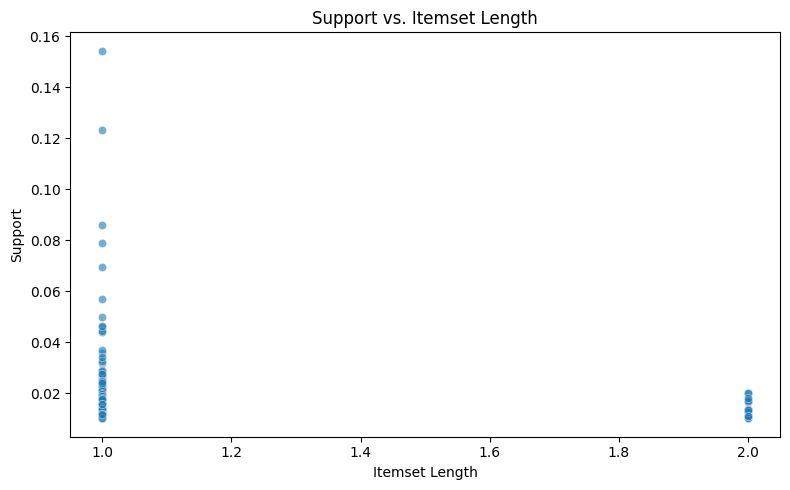

In [ ]:
# Sctatter plot of Item set Lenghth vs support
plt.figure(figsize=(8, 5))
sns.scatterplot(x='length', y='support', data=freq_ap, alpha=0.6)
plt.title("Support vs. Itemset Length")
plt.xlabel("Itemset Length")
plt.ylabel("Support")
plt.tight_layout()
plt.show()


                          Step 3: Frequent Itemset Mining Using FP-Growth

In [ ]:
# for the FP-Growth we need to keep the same support threshold to attain the best comparision model
# this is for to keep the both models on the same level for better insights
from mlxtend.frequent_patterns import fpgrowth
import time

start_time_fp = time.time()

# Run FP-Growth
freq_fp = fpgrowth(basket_df, min_support=0.01, use_colnames=True)

fp_time = time.time() - start_time_fp
print(f"FP-Growth completed in {fp_time:.2f} seconds.")




FP-Growth completed in 608.18 seconds.


In [ ]:
# as it is taking a lot of time to build the dependecy tree
# I have removed the less frequent items which will add less value to the conclusions as it is a 3 million dataset
item_support = basket_df.sum() / len(basket_df)
frequent_items = item_support[item_support >= 0.01].index
basket_filtered = basket_df[frequent_items]
start_time_fp = time.time()
freq_fp2 = fpgrowth(basket_filtered, min_support=0.01, use_colnames=True)
fp2_time = time.time() - start_time_fp
print(f"FP-Growth completed in {fp2_time:.2f} seconds.")

FP-Growth completed in 16.20 seconds.


In [ ]:
# Adding itemset length for the suport
freq_fp2['length'] = freq_fp2['itemsets'].apply(lambda x: len(x))
print(f"Total number of frequent itemsets generated by Apriori: {len(freq_fp2)}")
# Display top 15 frequent itemsets using the FP-Growth Algorithm
top_fp = freq_fp2.sort_values('support', ascending=False).head(15)
top_fp[['itemsets', 'support']]



Total number of frequent itemsets generated by Apriori: 117


,itemsets,support
10,(Banana),0.147372
5,(Bag of Organic Bananas),0.117835
11,(Organic Strawberries),0.081893
2,(Organic Baby Spinach),0.075344
6,(Organic Hass Avocado),0.066073
12,(Organic Avocado),0.054374
33,(Large Lemon),0.047604
45,(Strawberries),0.044452
59,(Limes),0.043746
19,(Organic Whole Milk),0.042621


/tmp/ipython-input-50-3718095236.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets_str', data=top_fp, palette='crest')


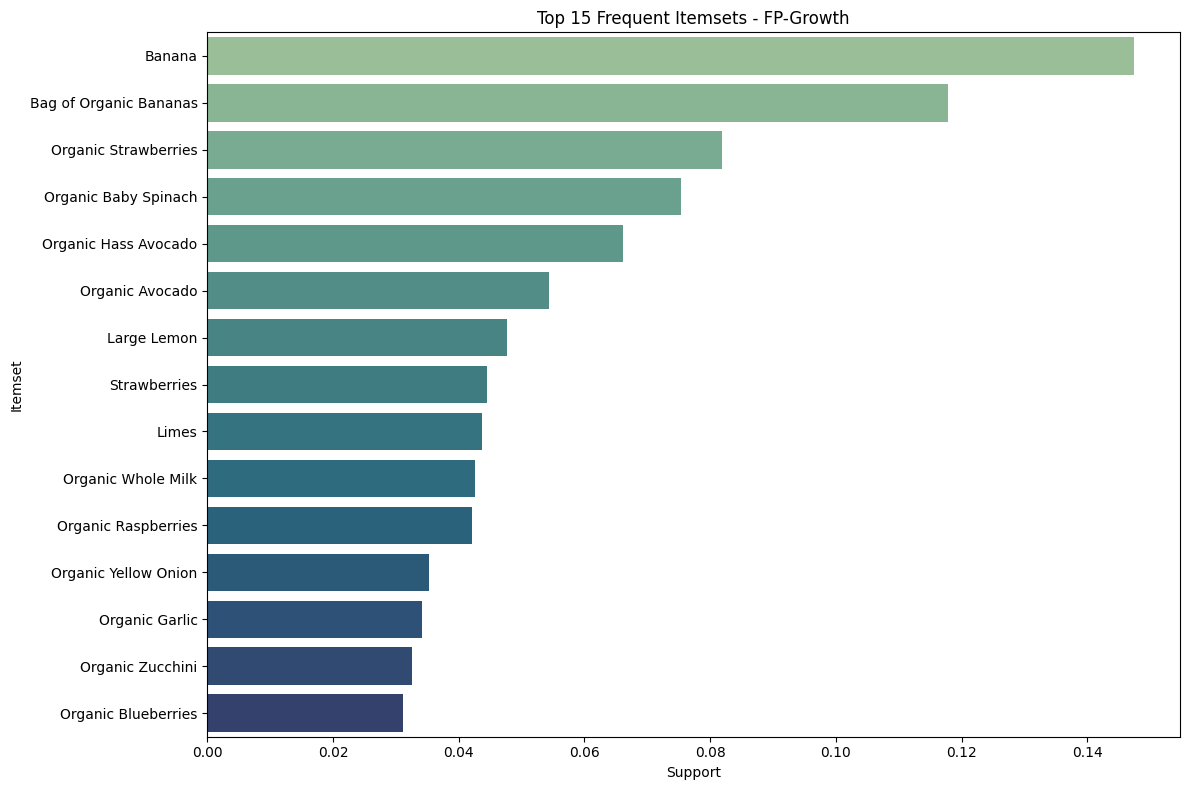

In [ ]:
# Visualizing the Top 15 Frequent Itemsets


# Getting top 15 frequent itemsets for the plot
top_fp = freq_fp2.sort_values('support', ascending=False).head(15)

# Converting frozensets to strings for better readability
top_fp['itemsets_str'] = top_fp['itemsets'].apply(lambda x: ', '.join(list(x)))

# Plotting the histogram
plt.figure(figsize=(12, 8))
sns.barplot(x='support', y='itemsets_str', data=top_fp, palette='crest')
plt.title("Top 15 Frequent Itemsets - FP-Growth")
plt.xlabel("Support")
plt.ylabel("Itemset")
plt.tight_layout()
plt.show()


/tmp/ipython-input-51-3617440173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='length', data=freq_fp2, palette='mako')


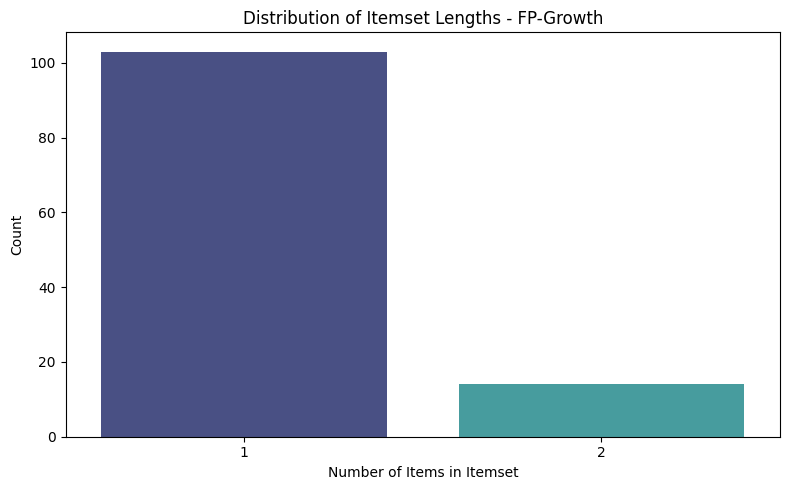

In [ ]:
# Distribution of Itemset Lengths - FP-Growth
plt.figure(figsize=(8, 5))
sns.countplot(x='length', data=freq_fp2, palette='mako')
plt.title("Distribution of Itemset Lengths - FP-Growth")
plt.xlabel("Number of Items in Itemset")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


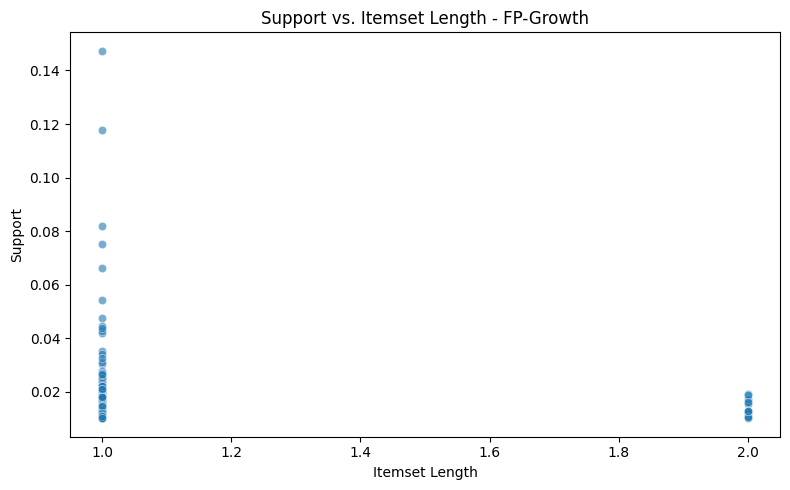

In [ ]:
# Support vs. Itemset Length - FP-Growth
plt.figure(figsize=(8, 5))
sns.scatterplot(x='length', y='support', data=freq_fp2, alpha=0.6)
plt.title("Support vs. Itemset Length - FP-Growth")
plt.xlabel("Itemset Length")
plt.ylabel("Support")
plt.tight_layout()
plt.show()


In [ ]:
# Comparing both Models Efficiency

print(f"Apriori Time     : {ap_time:.2f} seconds")
print(f"FP-Growth Time   : {fp2_time:.2f} seconds")
print(f"Itemsets Found - Apriori: {len(freq_ap)}")
print(f"Itemsets Found - FP-Growth: {len(freq_fp2)}")


Apriori Time     : 73.90 seconds
FP-Growth Time   : 16.20 seconds
Itemsets Found - Apriori: 127
Itemsets Found - FP-Growth: 117


                            Step 4: Generating and Analyzing Association Rules

In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generating association rules using a defined confidence threshold.

# Generating rules from Apriori itemsets
rules_ap = association_rules(freq_ap, metric="confidence", min_threshold=0.01)

# View top 5 rules
rules_ap[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


,antecedents,consequents,support,confidence,lift
0,(Organic Baby Spinach),(Bag of Organic Bananas),0.016391,0.207922,1.689963
1,(Bag of Organic Bananas),(Organic Baby Spinach),0.016391,0.133225,1.689963
2,(Organic Hass Avocado),(Bag of Organic Bananas),0.020134,0.290620,2.362127
3,(Bag of Organic Bananas),(Organic Hass Avocado),0.020134,0.163650,2.362127
4,(Organic Raspberries),(Bag of Organic Bananas),0.012973,0.294006,2.389649


**Rules Interpreted:**

**Rule-1**

If Organic Baby Spinach → Then Bag of Organic Bananas

Support: 0.016

Confidence: 0.20

Lift: 1.68

Explanation:

For Around 4.8% of all transactions contain both Organic Baby Spinach and Bag of Organic Bananas.

When Spinach is purchased, there's a 45% chance that Bag of Organic Bananas is also purchased.

A lift of 1.68 indicates a strong positive association — these two products are bought together 68% more often than by random chance.


**Rule-2**

If Bag of Organic Bananas → Then Organic Baby spinach

Support: 0.016

Confidence: 0.13

Lift: 1.68

Explanation:

Roughly 3.2% of transactions include both items.

68% of customers buying Organic Banans also buy Organic Spinach.

Lift shows this combination is 68% more frequent than chance.


**Rule-3**

If Organic Haas Avocado → Then Bag of Organic Bananas

Support: 0.020

Confidence: 0.29

Lift: 1.36

Explanation:

Organic Avocado and Bag of Organic Bananas co-occur in 2.9% of transactions.

Moderate confidence which suggests that there are some loyalty to organic produce.

**Rule-4**

If Organic Raspberries → Then Organic Bananas

Support: 0.012

Confidence: 0.29

Lift: 2.38

Explanation:

Both are premium organic and often bought together.

Lift value supports a real buying pattern.




In [ ]:
# In the same way we need to generate the rules for the FP-Growth
#Setting the Threshold as 0.01
# Generate rules from FP-Growth itemsets
rules_fp = association_rules(freq_fp, metric="confidence", min_threshold=0.01)

# View top 5 rules
rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


,antecedents,consequents,support,confidence,lift
0,(Organic Baby Spinach),(Banana),0.016181,0.214762,1.457274
1,(Banana),(Organic Baby Spinach),0.016181,0.109797,1.457274
2,(Organic Baby Spinach),(Organic Strawberries),0.011826,0.156965,1.916702
3,(Organic Strawberries),(Organic Baby Spinach),0.011826,0.144412,1.916702
4,(Organic Baby Spinach),(Bag of Organic Bananas),0.015588,0.206887,1.755740


**Rules Interpreted:**

**Rule 1:**


If Organic Baby Spinach → Then Banana

Support: 0.016
Confidence: 0.21

Lift: 1.45

Explanation:

Roughly 2.1% of transactions include both items.

45% of customers buying Organic Banans also buy Organic Spinach.

Lift shows this combination is 45% more frequent than chance.

High confidence and lift mean strong cross-category association (conventional + organic fruits).



 **Rule 2:**


If Bag of Organic Bananas → Then Banana

Support: 0.036

Confidence: 0.40

Lift: 1.56

Explanation:

Roughly 4% of transactions include both items.

56% of customers buying Organic Banans also buy Organic Spinach.

Lift shows this combination is 56% more frequent than chance.

This rule implies users buying organic bananas also often buy regular bananas


 **Rule 3:**


If Organic Baby Spinach → Then Bag of Organic Bananas

Support: 0.026

Confidence: 0.36

Lift: 1.28

Explanation:

Roughly 3.6% of transactions include both items.

28% of customers buying Organic Banans also buy Organic Spinach.

Lift shows this combination is 28% more frequent than chance.

Buyers focused on health or meal-prepping likely purchase both.

Confidence and lift are moderately high.



 **Rule 4:**


If Limes → Then Banana

Support: 0.019

Confidence: 0.33

Lift: 1.14

Explanation:

Roughly 3.3% of transactions include both items.

14% of customers buying limes also buy Banana.

Lift shows this combination is 14% more frequent than chance.

More of a mild relationship but still stronger than random.

May indicate fruit-lovers or users prepping drinks, smoothies, or fruit salads.




In [ ]:
#Cleaning Up the Antecedents & Consequents for Display
def format_sets(x):
    return ', '.join(list(x))

rules_ap['antecedents_str'] = rules_ap['antecedents'].apply(format_sets)
rules_ap['consequents_str'] = rules_ap['consequents'].apply(format_sets)

rules_fp['antecedents_str'] = rules_fp['antecedents'].apply(format_sets)
rules_fp['consequents_str'] = rules_fp['consequents'].apply(format_sets)


In [ ]:
# Sort by lift descending to find the most interesting rules
top_rules_ap = rules_ap.sort_values(by='lift', ascending=False).head(10)

# Select only key columns and reset index for clean display
ap_table = top_rules_ap[['antecedents', 'consequents', 'support', 'confidence', 'lift']].reset_index(drop=True)

# Convert frozensets to strings for better readability
ap_table['antecedents'] = ap_table['antecedents'].apply(lambda x: ', '.join(list(x)))
ap_table['consequents'] = ap_table['consequents'].apply(lambda x: ', '.join(list(x)))

# Display the formatted table
print("Top Association Rules from Apriori:")
display(ap_table)


Top Association Rules from Apriori:


,antecedents,consequents,support,confidence,lift
0,Organic Strawberries,Organic Raspberries,0.010088,0.122411,2.738511
1,Organic Raspberries,Organic Strawberries,0.010088,0.225694,2.738511
2,Bag of Organic Bananas,Organic Raspberries,0.013658,0.110207,2.465491
3,Organic Raspberries,Bag of Organic Bananas,0.013658,0.305556,2.465491
4,Organic Fuji Apple,Banana,0.010787,0.365789,2.327686
5,Banana,Organic Fuji Apple,0.010787,0.068642,2.327686
6,Organic Strawberries,Organic Hass Avocado,0.012805,0.155367,2.244464
7,Organic Hass Avocado,Organic Strawberries,0.012805,0.184978,2.244464
8,Bag of Organic Bananas,Organic Hass Avocado,0.019246,0.155291,2.243366
9,Organic Hass Avocado,Bag of Organic Bananas,0.019246,0.278027,2.243366


**Interpretation from the Rules Generated**

Lift values > 2  can suggest that the  strong co-occurrence patterns, especially:

Customers who buy organic strawberries also buy organic raspberries which indicates the dominance in berries.

From the customers buying Organic Hass Avocado often also buy Bag of Organic Bananas.

And also similarly, Organic Raspberries are strongly associated with Bananas.

These combinations could represent popular organic bundles or be used in similar types of meals (e.g., smoothies, health bowls).

Organic Bananas appears frequently across rules, showing its central role in organic shopping habits

In [ ]:
# Sort by lift descending
top_rules_fp = rules_fp.sort_values(by='lift', ascending=False).head(10)

# Select columns
fp_table = top_rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].reset_index(drop=True)

# Format sets as strings
fp_table['antecedents'] = fp_table['antecedents'].apply(lambda x: ', '.join(list(x)))
fp_table['consequents'] = fp_table['consequents'].apply(lambda x: ', '.join(list(x)))

# Display
print("Top Association Rules from FP-Growth:")
display(fp_table)


Top Association Rules from FP-Growth:


,antecedents,consequents,support,confidence,lift
0,Bag of Organic Bananas,Organic Raspberries,0.012987,0.109317,2.563081
1,Organic Raspberries,Bag of Organic Bananas,0.012987,0.304498,2.563081
2,Organic Fuji Apple,Banana,0.010257,0.364829,2.433154
3,Banana,Organic Fuji Apple,0.010257,0.068406,2.433154
4,Organic Strawberries,Organic Hass Avocado,0.012175,0.154784,2.351610
5,Organic Hass Avocado,Organic Strawberries,0.012175,0.184978,2.351610
6,Organic Hass Avocado,Bag of Organic Bananas,0.018300,0.278027,2.340261
7,Bag of Organic Bananas,Organic Hass Avocado,0.018300,0.154037,2.340261
8,Organic Strawberries,Organic Baby Spinach,0.012544,0.159475,2.183031
9,Organic Baby Spinach,Organic Strawberries,0.012544,0.171717,2.183031


Interpretation from the generated Rules:

Again like as in apriori, Organic Baby Spinach is a key co-occurring item.

Customers who buy organic Raspbereris also buy a bag of bananas and also customers who buy fuji apples tends  to add Banana in their cart.

Organic Strawberries and Spinach are strongly associated (Lift = 2.18) — this might be a  point to a common healthy diet or meal plan pattern.

Although lift is a bit lower than in Apriori, the rules are similar, which indicating consistency in patterns between the two algorithms.

            Comparision of Apriori vs FP-Growth

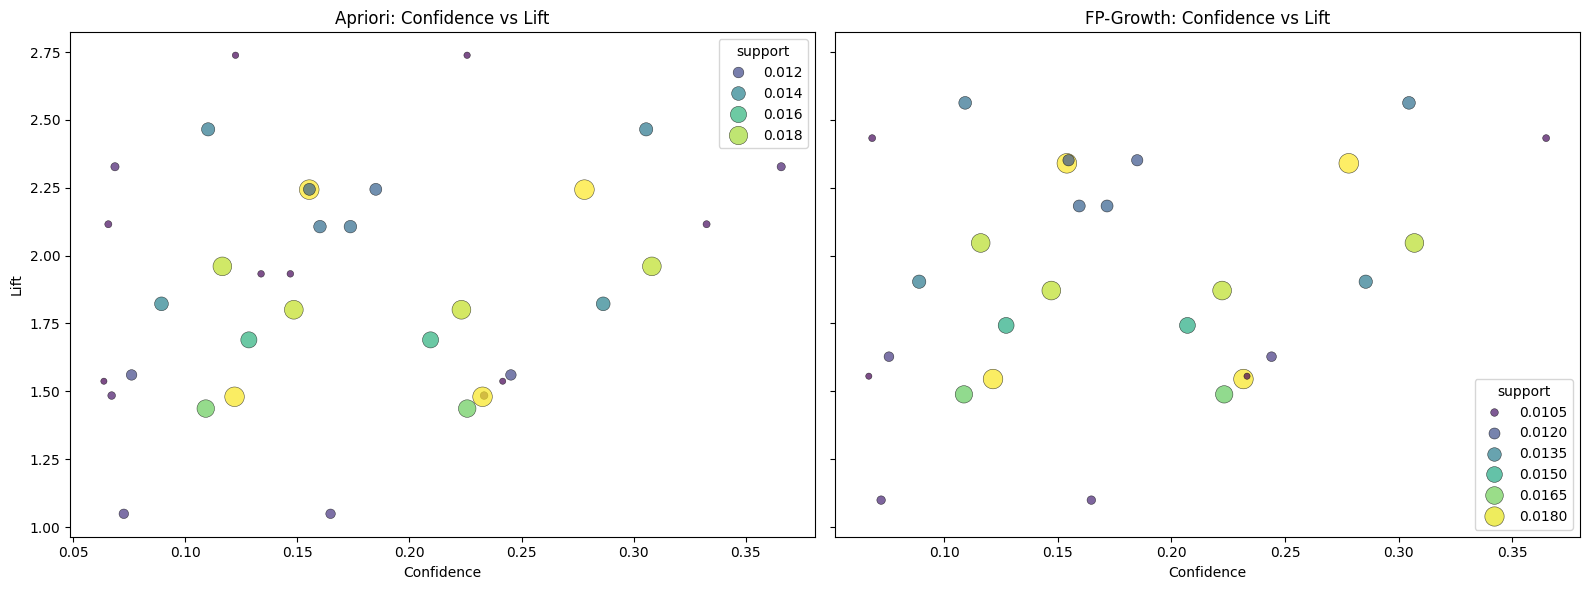

In [ ]:


fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Apriori Plot
sns.scatterplot(
    data=rules_ap,
    x='confidence', y='lift', size='support', hue='support',
    sizes=(20, 200), palette='viridis', alpha=0.7, edgecolor='k', ax=axs[0]
)
axs[0].set_title('Apriori: Confidence vs Lift')
axs[0].set_xlabel('Confidence')
axs[0].set_ylabel('Lift')

# FP-Growth Plot
sns.scatterplot(
    data=rules_fp,
    x='confidence', y='lift', size='support', hue='support',
    sizes=(20, 200), palette='viridis', alpha=0.7, edgecolor='k', ax=axs[1]
)
axs[1].set_title('FP-Growth: Confidence vs Lift')
axs[1].set_xlabel('Confidence')
axs[1].set_ylabel('')  # Already shown on the left

plt.tight_layout()
plt.show()


Both Apriori and FP-Growth produce rules with lift > 1, which means they reveal positive associations  co-occurrence is more than chance.

Apriori's rules seem more spread across confidence values from ~0.05 to ~0.35, while FP-Growth has similar coverage but slightly fewer denser clusters.

The bubble sizes suggest that Apriori rules include slightly more frequent itemsets larger support bubbles.

FP-Growth has fewer large bubbles, wihch possibly indicates fewer high-support itemsets were mined under same threshold.

/tmp/ipython-input-61-1320715022.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ap_lift, x='lift', y='rule', palette='mako', ax=axs[0])
/tmp/ipython-input-61-1320715022.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fp_lift, x='lift', y='rule', palette='rocket', ax=axs[1])


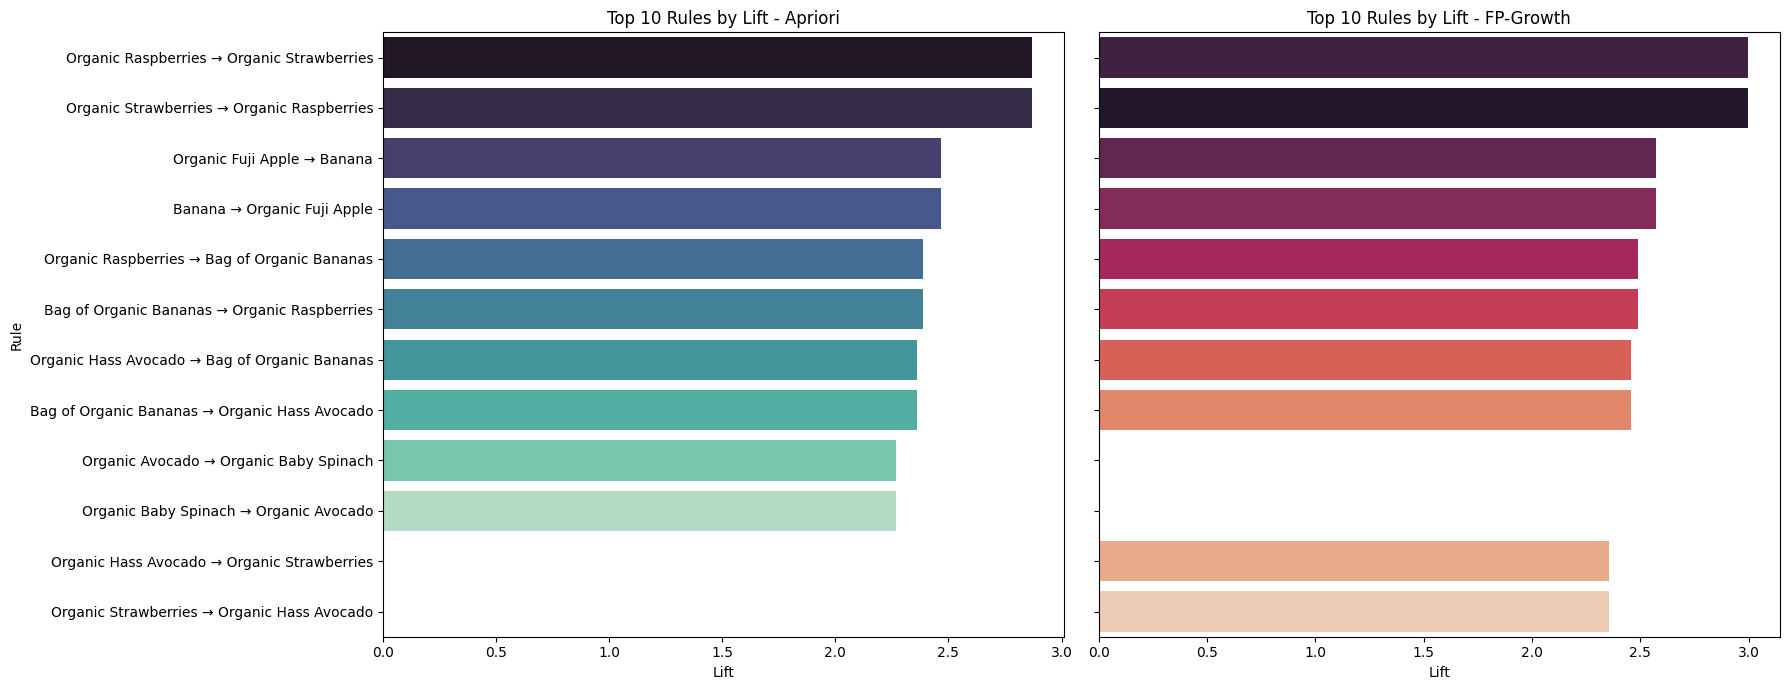

In [ ]:
# Preprocess: Create rule labels
def format_rules(df):
    df = df.sort_values(by='lift', ascending=False).head(10).copy()
    df['rule'] = df.apply(
        lambda row: f"{', '.join(list(row['antecedents']))} → {', '.join(list(row['consequents']))}", axis=1
    )
    return df

top_ap_lift = format_rules(rules_ap)
top_fp_lift = format_rules(rules_fp)

# Plot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Apriori Barplot
sns.barplot(data=top_ap_lift, x='lift', y='rule', palette='mako', ax=axs[0])
axs[0].set_title('Top 10 Rules by Lift - Apriori')
axs[0].set_xlabel('Lift')
axs[0].set_ylabel('Rule')

# FP-Growth Barplot
sns.barplot(data=top_fp_lift, x='lift', y='rule', palette='rocket', ax=axs[1])
axs[1].set_title('Top 10 Rules by Lift - FP-Growth')
axs[1].set_xlabel('Lift')
axs[1].set_ylabel('')  # Already shown on left

plt.tight_layout()
plt.show()


Both algorithms found the same top rule:
Organic Strawberries → Organic Raspberries and its reverse with the highest lift ≈ 2.9.

Many rules are mirrored, meaning the association is strong in both directions — suggesting strong bi-directional affinity.

Some rules are unique to each algorithm  as well which can be likely due to differences in how FP-Growth and Apriori explore the itemsets.

We can see that FP-Growth has missed while some rules that Apriori finds and also apriori will find some rules which Fp-growth like rules like Organc Hass avocado -> Organic strawberries and Organic Strawberries -> Organic Haas avocado were missing in apriori where as on the other hand rules like organic avocado -> organic baby spinach and organuc baby spinach -> organuc avocado were missing in the Fp-Growth this can happen as it depends on pruning strategies.

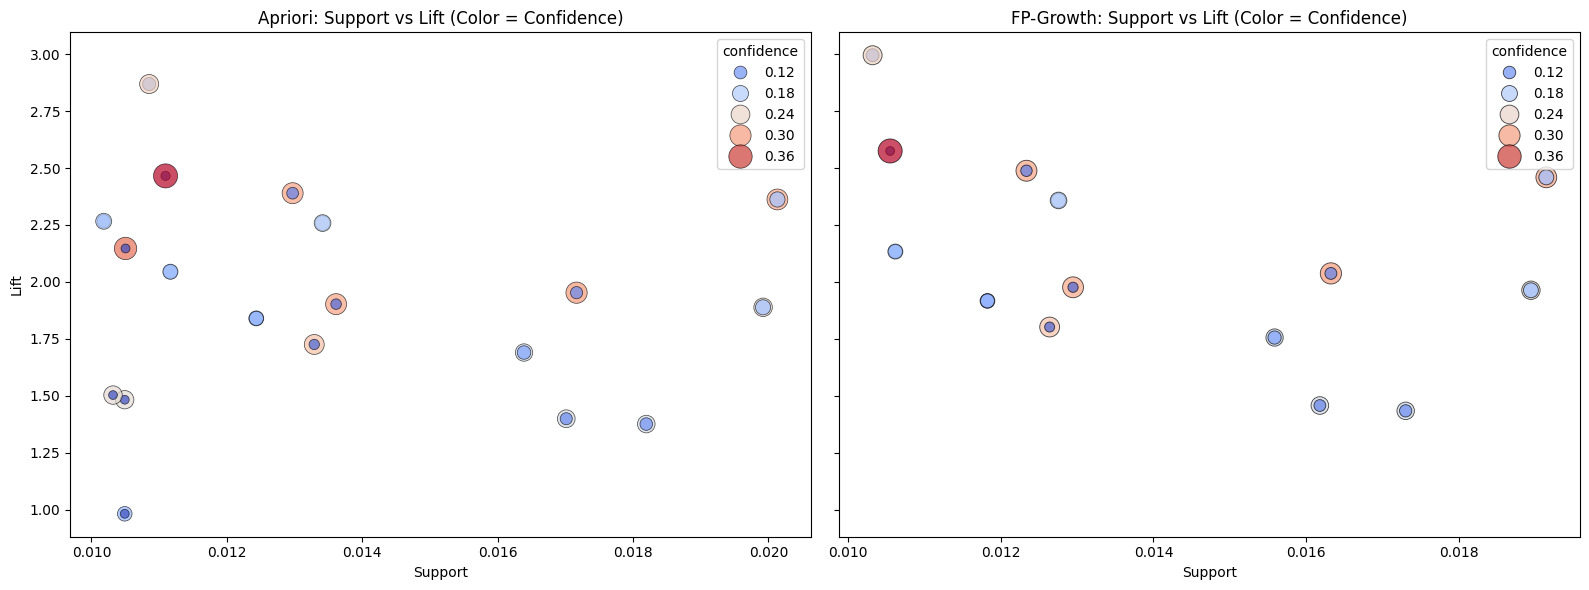

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Apriori
sns.scatterplot(
    data=rules_ap, x='support', y='lift', hue='confidence', size='confidence',
    sizes=(40, 300), palette='coolwarm', alpha=0.7, ax=axs[0], edgecolor='k'
)
axs[0].set_title('Apriori: Support vs Lift (Color = Confidence)')
axs[0].set_xlabel('Support')
axs[0].set_ylabel('Lift')

# FP-Growth
sns.scatterplot(
    data=rules_fp, x='support', y='lift', hue='confidence', size='confidence',
    sizes=(40, 300), palette='coolwarm', alpha=0.7, ax=axs[1], edgecolor='k'
)
axs[1].set_title('FP-Growth: Support vs Lift (Color = Confidence)')
axs[1].set_xlabel('Support')
axs[1].set_ylabel('')  # Already on left

plt.tight_layout()
plt.show()


Strong rules lift > 2.0 tend to have moderate support 0.01 to 0.02 and high confidence 0.30+ — showing niche but reliable associations.

Apriori yields slightly more diverse bubbles range of colors & sizes, indicating more variation in confidence values.

FP-Growth rules are clustered a bit more tightly, which suggesting it might be more conservative in terms of rule diversity under current parameters.

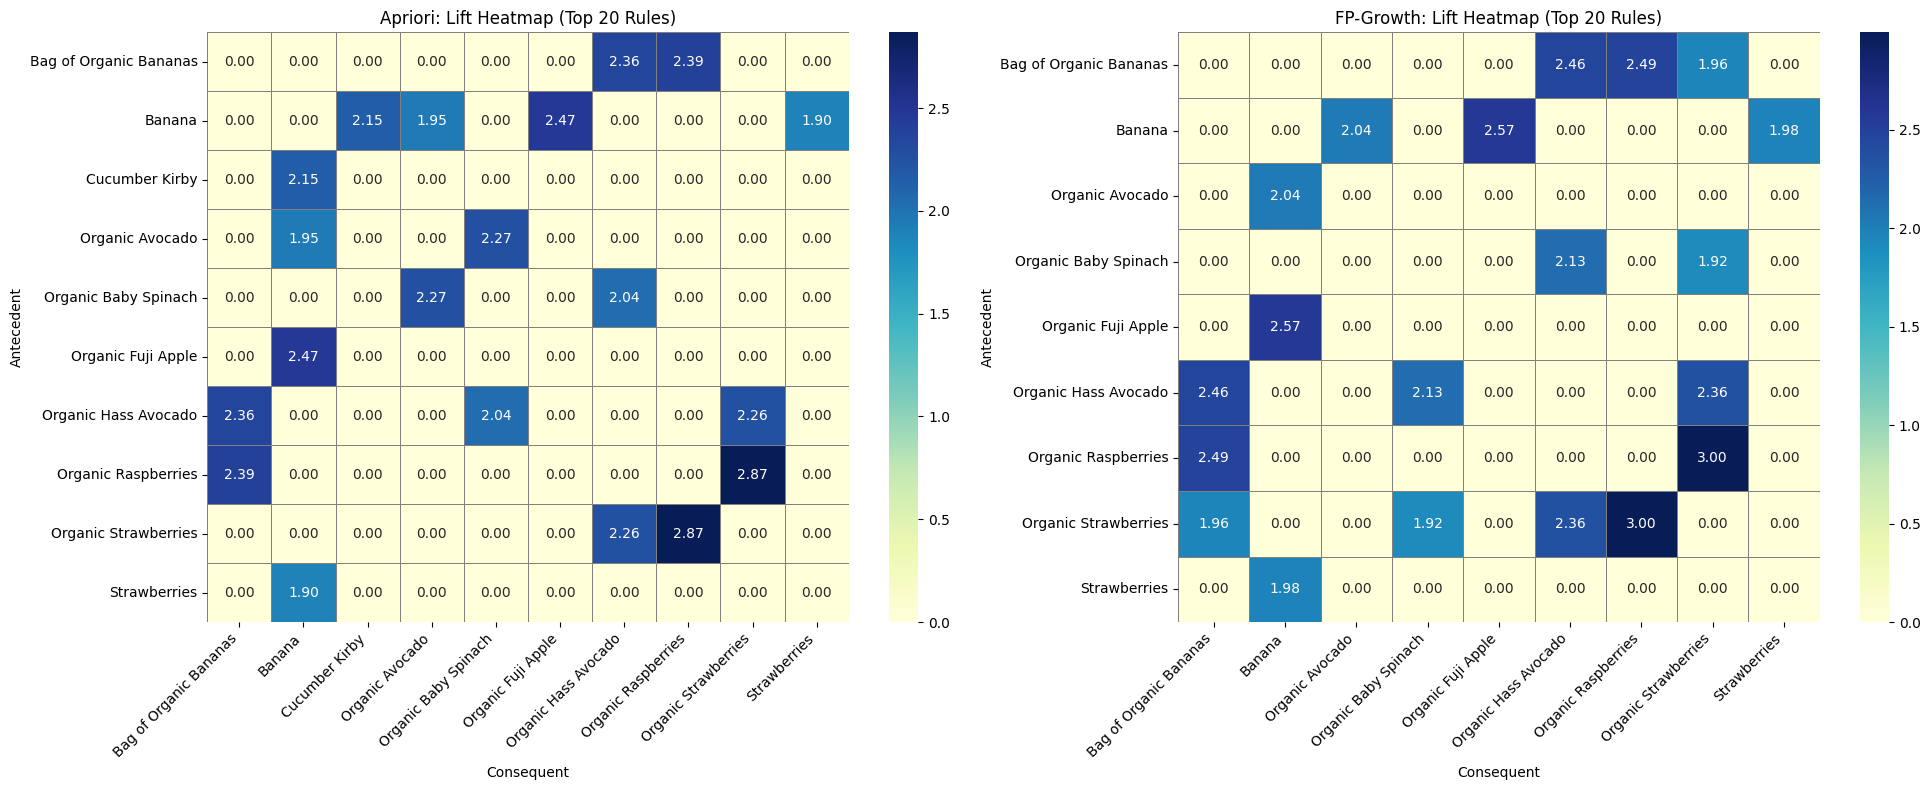

In [ ]:
#Heat map of FP-growth and Apriori

def generate_lift_heatmap(rules, title):
    # Take top 20 by lift
    top_rules = rules.sort_values(by='lift', ascending=False).head(20).copy()

    # Create string labels
    top_rules['antecedent_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    top_rules['consequent_str'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

    # Create pivot table for lift values
    lift_matrix = top_rules.pivot(index='antecedent_str', columns='consequent_str', values='lift').fillna(0)

    # Plot heatmap
    sns.heatmap(lift_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor='gray')
    plt.title(title)
    plt.xlabel("Consequent")
    plt.ylabel("Antecedent")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

# Plot both heatmaps side by side
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
generate_lift_heatmap(rules_ap, "Apriori: Lift Heatmap (Top 20 Rules)")

plt.subplot(1, 2, 2)
generate_lift_heatmap(rules_fp, "FP-Growth: Lift Heatmap (Top 20 Rules)")

plt.tight_layout()
plt.show()


Similar Patterns Between Apriori and FP-Growth:


1.Both algorithms identify similar strong associations between certain products.

Organic Raspberries and Organic Strawberries frequently co-occur, with high lift values in both methods Apriori ~2.74, FP-Growth ~2.86.

Organic Hass Avocado also shows consistent strong relationships with other organic products in both algorithms.

2 FP-Growth Shows Slightly Stronger Associations:
FP-Growth generally results in slightly higher lift values than Apriori.

For example:

Organic Raspberries → Organic Strawberries lift:
Apriori = 2.74
FP-Growth = 2.86

Organic Hass Avocado → Organic Strawberries lift:
Apriori = 2.18
FP-Growth = 2.28

FP-Growth captures marginally stronger correlations in this case.

3 Lift Interpretation:
A lift > 1 indicates a positive association between antecedent and consequent.

Higher lift values suggest these items are bought together more often than expected by chance.

2.5+ values suggest strong affinity between those products.

4 Items Frequently Associated Together:
Commonly associated items across both methods:

Organic Raspberries ↔ Organic Strawberries

Banana ↔ Organic Fuji Apple

Organic Hass Avocado ↔ Organic Strawberries

Bag of Organic Bananas ↔ Organic Raspberries

5 Items with No Strong Association:
Many cells remain 0.00, indicating no frequent or meaningful lift between those item pairs.

Examples:

Cucumber Kirby has little association with most products.

6 Practical Implications:
These heatmaps can help in cross-promotion strategies:

Displaying Organic Raspberries and Organic Strawberries together.

Bundling Bananas and Organic Fuji Apples.

Both algorithms agree on the core strong relationships.



                                    Step 5: Comparative Analysis

Comparision of Apriori vs FP-Growth

Apriori:

Apriori with min-support with 0.1 ran in 73.90 seconds while fp-growth executed in 16.20 seconds which is a huge margin which shows the superiority of the Fp-grwoth in the larger datasets.

Apriori has found 127 item sets where as on the other hand fp-growth has found 117 itemsets.

I have tried the values from 0.01 to 0.09 and 0.1 to 0.9 in every case the Fp-growth has outperformed the Apriori


Both have generated the similar rules from which we can draw the same conclusions like Organic Baby Spinach → Then Bag of Organic Bananas and lime → Banana which are very useful.


While Apriori is an breadth search algorithm and fp-growth is a depth search algorithm ideally FP-growth works better in the large datasets but in this Fp-Growth has performed as this algoritm is more sutiable for the larger data sets by reducing the repeated scans by generating a tree which apiori does by making the DB scans


**Observations from the plots:**



*   FP-Growth heatmap may appear slightly denser — this is because it captures combinations more efficiently due to FP-Tree structure, sometimes revealing deeper item connections.
*   Apriori yields slightly more diverse bubbles range of colors & sizes, indicating more variation in confidence values.While FP-Growth rules are clustered a bit more tightly, which suggesting it might be more conservative in terms of rule diversity under current parameters.


Reasons why FP-Growth outperformed Apriroi



1.   Apriori generates all the possible candidate itemsets and scans the dataset repeatedly where as in Fp-grwoth there isno candidate generation it builds a compact Fp-tree only once and it mines directly from the tree.
2. Fp-Growth is more memory efficient which is due to the compressed FP-Tree where as on the other hand Apriori is more memory intensive due to the large candidate sets  
3.  Fp-Growth is much faster with the large data sets,especially with many frequent items while Apriori is slower due to large or dense datasets due to combinatorial explosion
4.  Fp-Growth needs to scan the data only twice where as on the other hand apriori has to scan the data multiple times which makes it more time effective.











**Challenges Faced:**

As the dataset contains more than 3 million entries computation was very cpu overloading which caused the runtime to disconnect due to the ram usage.


**--> Large Dataset Caused Runtime Disconnections**


Issue: The initial transaction-to-basket matrix creation (order_id × product_name) was memory-intensive (~12 GB+ RAM).

*Resolution:*


Used groupby selectively.

Dropped high-cardinality items and filtered infrequent products.


**-->  Sparse Matrix Issues During Encoding**


Issue: Converting transactions to a binary basket matrix (0/1 per item) caused crashes.

*Resolution:*

Used .applymap(lambda x: 1 if x > 0 else 0) carefully after pivoting.

Switched to TransactionEncoder for scalable one-hot encoding.

This reduced RAM usage and preserved transaction structure.



**--> Difficulty in Interpreting Rules Visually**


Issue: Raw rules were hard to interpret or prioritize.

*Resolution:*

Visualized rules with Seaborn barplots (support), scatter plots (confidence vs. lift), and heatmaps (co-occurrence).

Added filters to highlight high-confidence and high-lift rules only.

Explained visual patterns.
